Step 1: Data Loading and Preprocessing
Load the dataset using pandas.
Handle any missing values appropriately.
Convert categorical variables into dummy/indicator variables.

In [6]:
import pandas as pd

# Load the dataset
file_path = 'Downloads/heart-disease.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# Handle missing values (if any)
# For simplicity, we'll drop rows with missing values
df.dropna(inplace=True)

# Convert categorical variables into dummy/indicator variables
# Assuming 'cp' (chest pain type) and 'sex' are categorical
df = pd.get_dummies(df, columns=['cp', 'sex'], drop_first=True)

# Display the first few rows of the modified dataset
df.head()


,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_1,cp_2,cp_3,sex_1
0,63,145,233,1,0,150,0,2.3,0,0,1,1,False,False,True,True
1,37,130,250,0,1,187,0,3.5,0,0,2,1,False,True,False,True
2,41,130,204,0,0,172,0,1.4,2,0,2,1,True,False,False,False
3,56,120,236,0,1,178,0,0.8,2,0,2,1,True,False,False,True
4,57,120,354,0,1,163,1,0.6,2,0,2,1,False,False,False,False


Step 2: Data Analysis
Calculate the average age of patients with and without heart disease.
Determine the distribution of chest pain types among patients.
Find the correlation between thalach (maximum heart rate) and age.
Analyze the effect of sex on the presence of heart disease.

In [10]:
# Calculate the average age of patients with and without heart disease
avg_age_with_disease = df[df['target'] == 1]['age'].mean()
avg_age_without_disease = df[df['target'] == 0]['age'].mean()

# Find the correlation between thalach (maximum heart rate) and age
thalach_age_correlation = df['thalach'].corr(df['age'])

avg_age_with_disease, avg_age_without_disease, thalach_age_correlation


(52.4969696969697, 56.60144927536232, -0.3985219381210676)

Step 3: Data Visualization
Plot a histogram of the age distribution of patients.
Create a bar chart showing the distribution of chest pain types among patients.
Plot a scatter plot to show the relationship between thalach (maximum heart rate) and age.
Create a box plot to compare the age distribution of patients with and without heart disease.

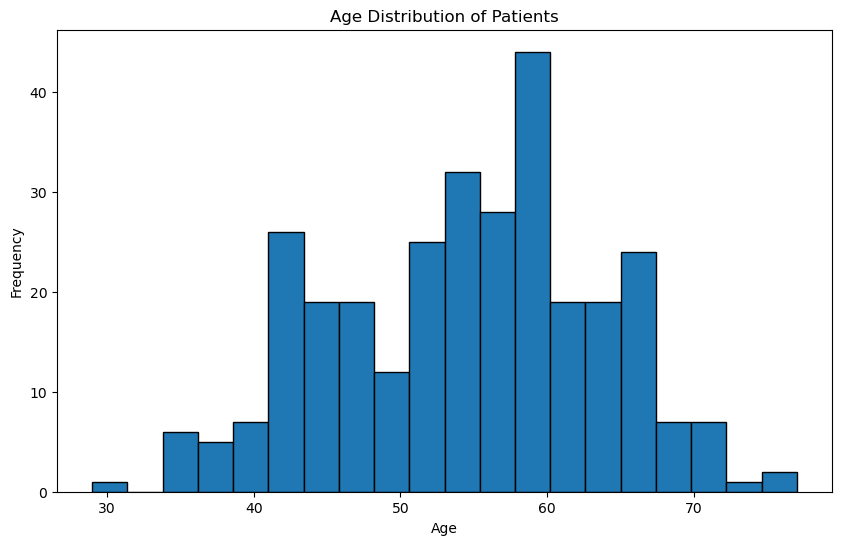

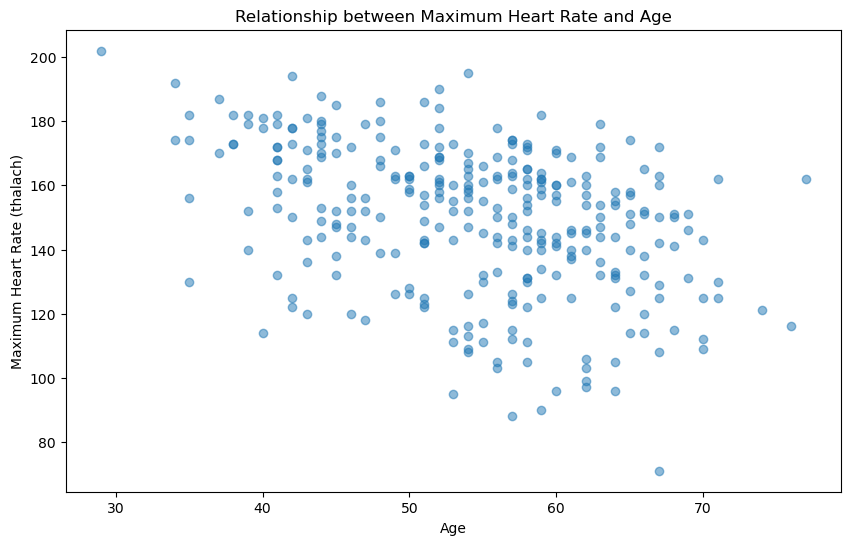

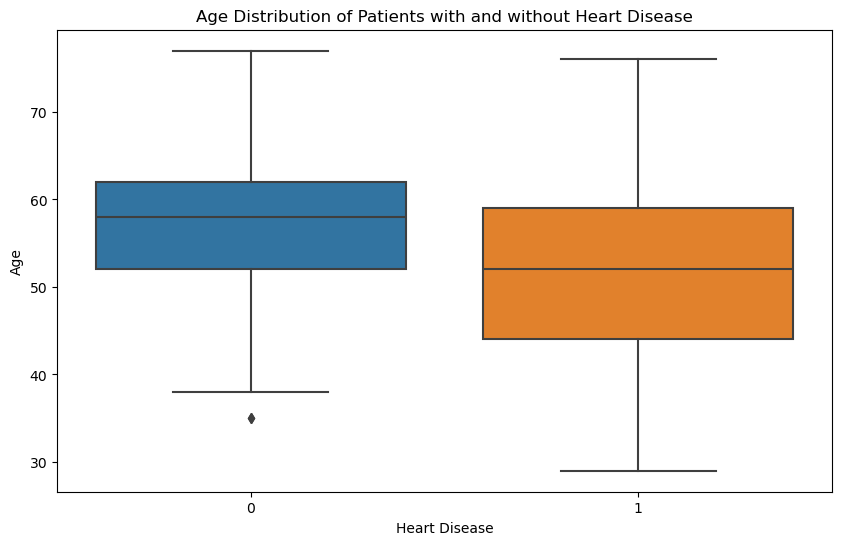

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram of the age distribution of patients
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# Plot a scatter plot to show the relationship between thalach (maximum heart rate) and age
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['thalach'], alpha=0.5)
plt.title('Relationship between Maximum Heart Rate and Age')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.show()

# Create a box plot to compare the age distribution of patients with and without heart disease
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=df)
plt.title('Age Distribution of Patients with and without Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()


Step 4: Advanced Analysis (using numpy)
Calculate the correlation matrix for all numerical features in the dataset.
Perform a rolling mean analysis on the chol (cholesterol) levels with a window size of 5 and plot it.

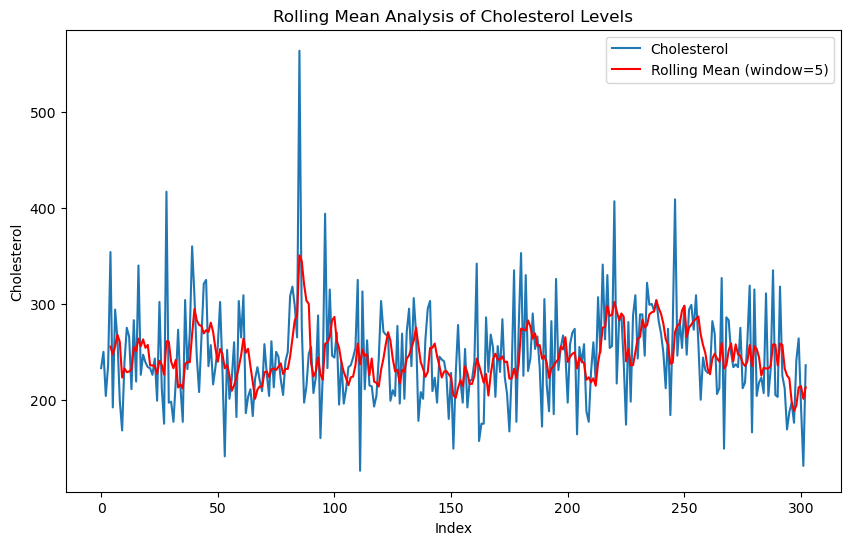

In [13]:
import numpy as np

# Calculate the correlation matrix for all numerical features
correlation_matrix = df.corr()

# Perform a rolling mean analysis on the chol (cholesterol) levels with a window size of 5
df['chol_rolling_mean'] = df['chol'].rolling(window=5).mean()

# Plot the rolling mean of cholesterol levels
plt.figure(figsize=(10, 6))
plt.plot(df['chol'], label='Cholesterol')
plt.plot(df['chol_rolling_mean'], label='Rolling Mean (window=5)', color='red')
plt.title('Rolling Mean Analysis of Cholesterol Levels')
plt.xlabel('Index')
plt.ylabel('Cholesterol')
plt.legend()
plt.show()
